<center>
<h1>Activity: Diabetes Factors Visualizations<br>using Matplotlib and Seaborn<br><b></b></h1>
<h2>Johann Sebastian Catalla, BSCS-III</h2>
Professor: Dean Rodrigo Belleza Jr. <br>
As partial requirement for the course <br>CSDATA01: Data Science Fundamentals<br><br>
</center>

---

<b>Data Dictionary</b>
<ul>
    <li>Pregnancies: Number of times pregnant</li>
    <li>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
    <li>BloodPressure: Diastolic blood pressure (mm Hg)</li>
    <li>SkinThickness: Triceps skin fold thickness (mm)</li>
    <li>Insulin: 2-Hour serum insulin (mu U/ml)</li>
    <li>BMI: Body mass index (weight in kg/(height in m)^2)</li>
    <li>DiabetesPedigreeFunction: Diabetes pedigree function</li>
    <li>Age: Age (years)</li>
    <li>Outcome: Class variable (0 or 1)</li>
</ul>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [47]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [63]:
# List of columns that contain incorrect data (zeros that should be NaN)
columns_with_wrong_data = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Function to replace zero values with NaN
def replace_func(x):
    if x == 0:
        return np.nan
    return x

# Apply the replace_func to each column in columns_with_wrong_data
for column in columns_with_wrong_data:
    data[column] = data[column].map(replace_func).values

In [51]:
continuous_data_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

## Matplotlib visualizations

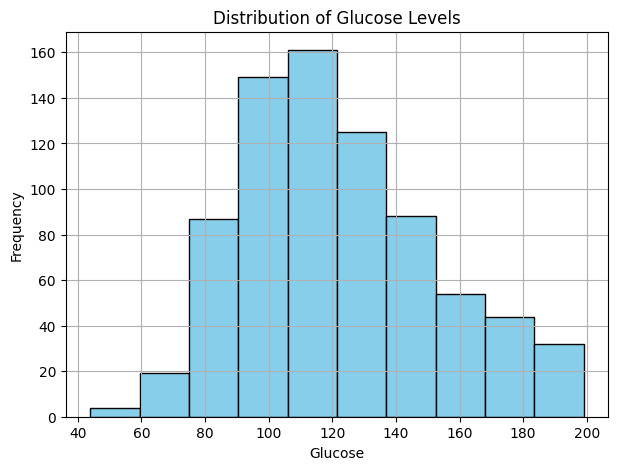

In [52]:
# 1. Histogram of Glucose Levels
plt.figure(figsize=(7,5))
plt.hist(data['Glucose'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram shows the distribution of glucose levels across all patients in the dataset. The majority of the patients have glucose levels between 90 and 130, with fewer patients having either very low or very high glucose levels. This graph answers the question, "What is the distribution of glucose levels in the dataset?"

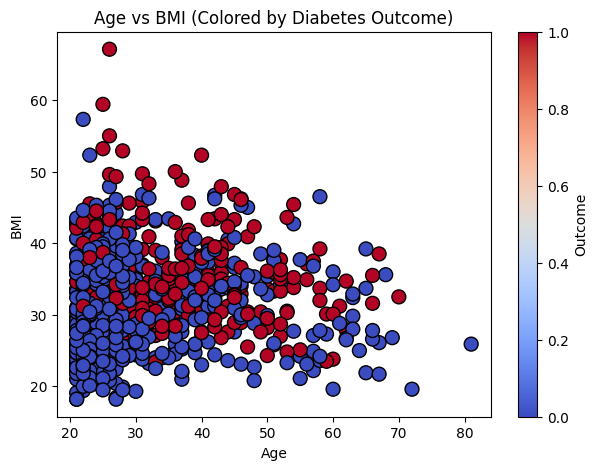

In [53]:
# 2. Scatter plot: Age vs BMI with Outcome as color
plt.figure(figsize=(7,5))
plt.scatter(data['Age'], data['BMI'], c=data['Outcome'], cmap='coolwarm', edgecolor='k', s=100)
plt.title('Age vs BMI (Colored by Diabetes Outcome)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Outcome')
plt.show()


This scatter plot illustrates the relationship between age and BMI, with color coding to indicate whether the individual has diabetes or not. We observe that both diabetic and non-diabetic individuals appear across the entire age range, but those with higher BMI (around 40 and above) tend to be more likely to have diabetes (red markers). Most of the younger individuals, especially with lower BMI values, are non-diabetic (blue markers).

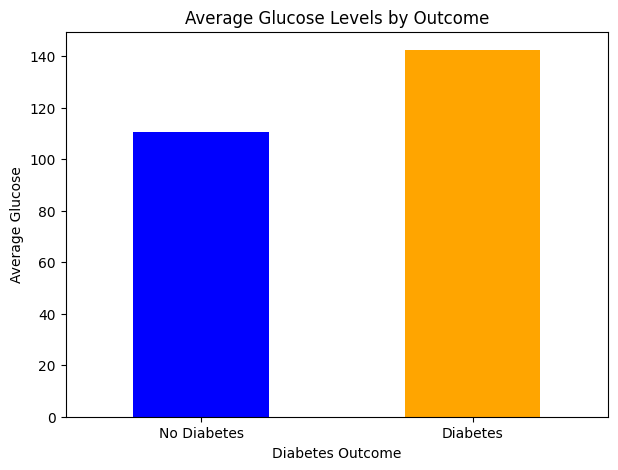

In [54]:
# 3. Bar chart: Average Glucose by Outcome
avg_glucose_outcome = data.groupby('Outcome')['Glucose'].mean()
plt.figure(figsize=(7,5))
avg_glucose_outcome.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Glucose Levels by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Glucose')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

The higher average glucose in the diabetes group may indicate that some individuals with diabetes are not adequately managing their blood sugar levels. This could suggest a need for improved education, access to care, or treatment adherence. The data could potentially reflect the severity of diabetes within the sampled population. Higher average glucose levels in the diabetes group might suggest a higher prevalence of uncontrolled or more severe cases.

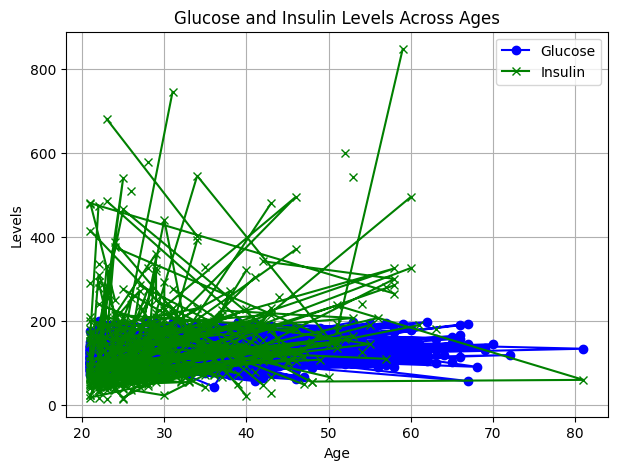

In [55]:

# 4. Line plot: Glucose and Insulin across different ages
plt.figure(figsize=(7,5))
plt.plot(data['Age'], data['Glucose'], label='Glucose', marker='o', color='blue')
plt.plot(data['Age'], data['Insulin'], label='Insulin', marker='x', color='green')
plt.title('Glucose and Insulin Levels Across Ages')
plt.xlabel('Age')
plt.ylabel('Levels')
plt.legend()
plt.grid(True)
plt.show()


 The line plot shows the trends in glucose and insulin levels across different ages. Glucose levels remain relatively high across all ages, while insulin levels vary more significantly. This plot helps answer the question, "How do glucose and insulin levels change across different ages?"

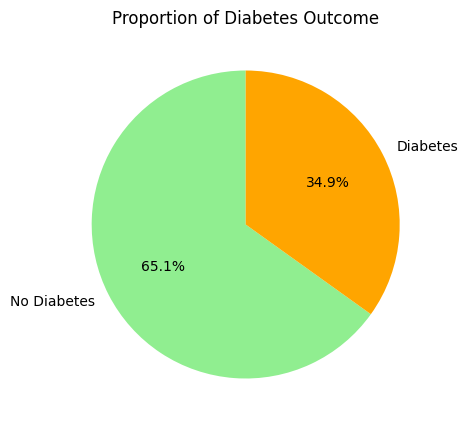

In [56]:
# 5. Pie chart: Outcome distribution
outcome_counts = data['Outcome'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Proportion of Diabetes Outcome')
plt.show()

The pie chart shows the proportion of patients who have diabetes versus those who do not. The two outcomes are almost evenly split in this dataset, with a slight majority not having diabetes. This visualization answers the question, "What is the overall proportion of patients with and without diabetes?"

## Seaborn Visualizations

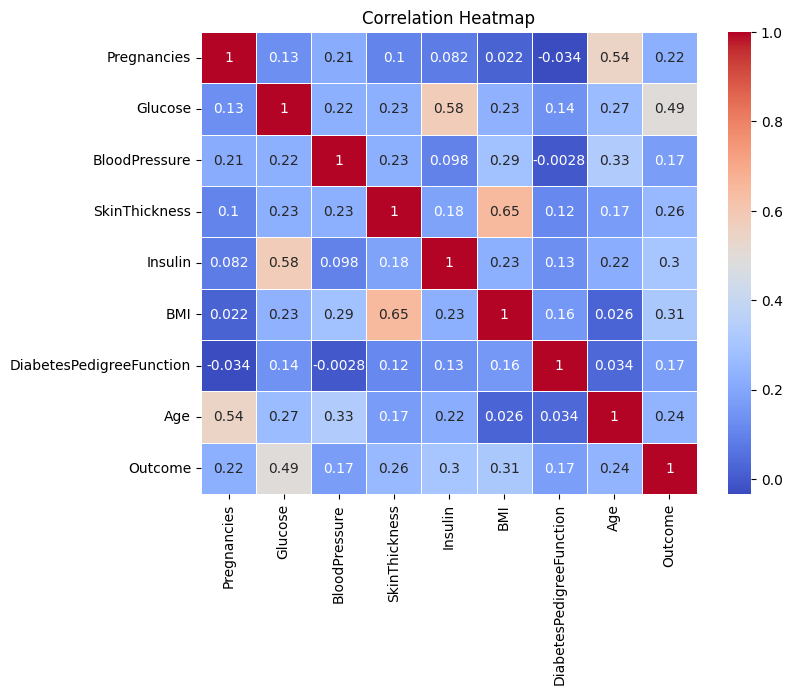

In [57]:
# 1. Heatmap of Correlation Matrix
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


 This heatmap visualizes the correlation between different variables in the dataset. Darker shades of red represent a stronger positive correlation, while darker shades of blue represent a stronger negative correlation. For example, we can observe that glucose is strongly correlated with the diabetes outcome (red square), indicating that higher glucose levels are associated with an increased likelihood of diabetes.

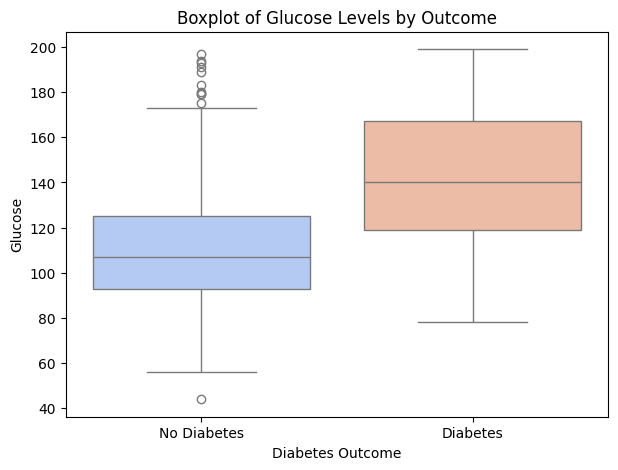

In [58]:
# 2. Boxplot: Glucose Levels by Outcome
plt.figure(figsize=(7,5))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='coolwarm')
plt.title('Boxplot of Glucose Levels by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


The boxplot compares the distribution of glucose levels between non-diabetic (Outcome = 0) and diabetic (Outcome = 1) individuals. The median glucose level is much higher for diabetic individuals, with fewer outliers in comparison to the non-diabetic group.

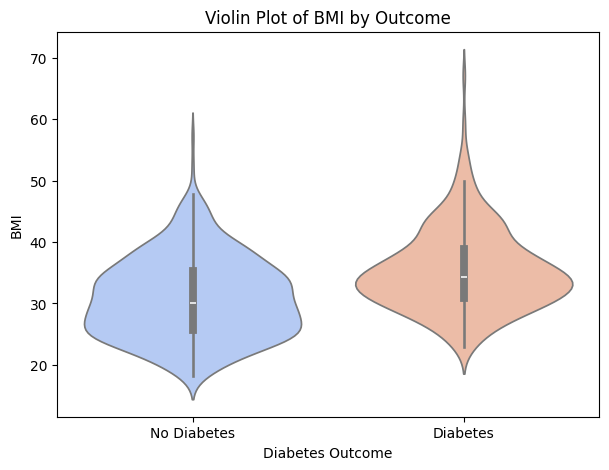

In [59]:
# 3. Violin Plot: BMI by Outcome
plt.figure(figsize=(7,5))
sns.violinplot(x='Outcome', y='BMI', data=data, palette='coolwarm')
plt.title('Violin Plot of BMI by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

This violin plot visualizes the distribution of BMI for both non-diabetic and diabetic groups. It combines a boxplot and a density estimate to show the spread of BMI values. For non-diabetic individuals, BMI values tend to be lower, while for diabetic individuals, the BMI distribution is broader and shifts towards higher values.

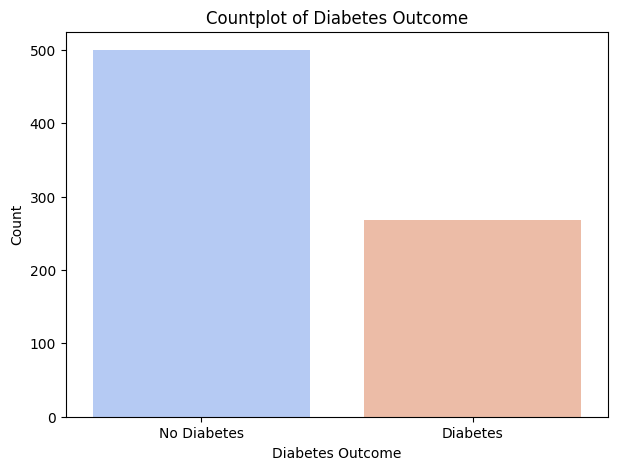

In [60]:
# 4. Countplot of Outcome
plt.figure(figsize=(7,5))
sns.countplot(x='Outcome', data=data, palette='coolwarm')
plt.title('Countplot of Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

 This countplot shows the number of individuals in each outcome group. The non-diabetic group (Outcome = 0) has slightly more individuals than the diabetic group (Outcome = 1).

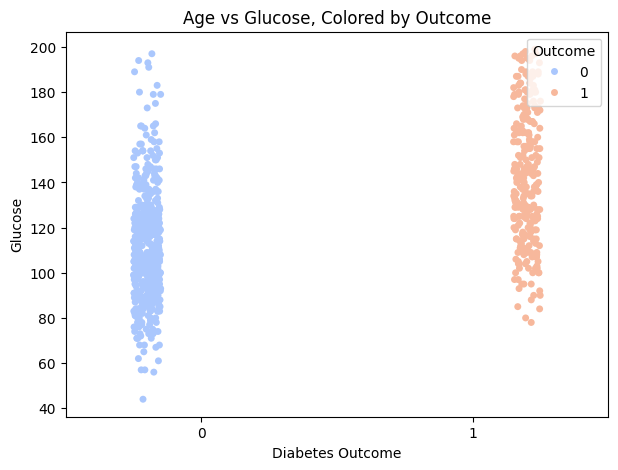

In [61]:
# 5. Strip Plot: Age vs Glucose, colored by Outcome
plt.figure(figsize=(7,5))
sns.stripplot(x='Outcome', y='Glucose', data=data, hue='Outcome', palette='coolwarm', dodge=True, jitter=True)
plt.title('Age vs Glucose, Colored by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.legend(title='Outcome', loc='upper right')
plt.show()


The strip plot shows the distribution of glucose levels across different ages, with colors indicating diabetes outcome (red for diabetic, blue for non-diabetic). We can see that individuals with higher glucose levels (above 150) are more likely to have diabetes (red points).

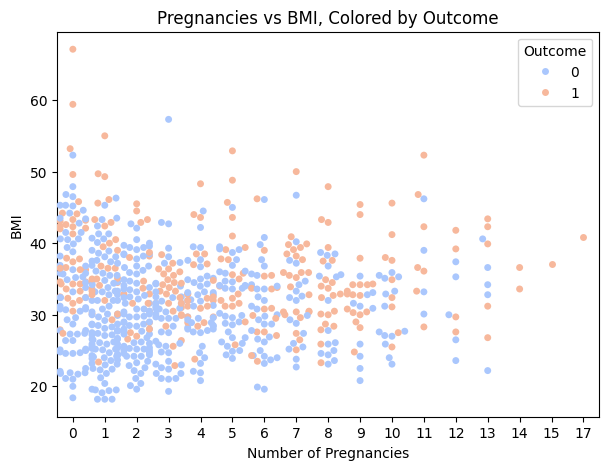

In [62]:
# 6. Swarm Plot: Pregnancies vs BMI, colored by Outcome
plt.figure(figsize=(7,5))
sns.swarmplot(x='Pregnancies', y='BMI', data=data, hue='Outcome', palette='coolwarm')
plt.title('Pregnancies vs BMI, Colored by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('BMI')
plt.legend(title='Outcome')
plt.show()


This swarm plot visualizes the relationship between the number of pregnancies and BMI, with color representing diabetes outcome. There is a clear cluster of individuals with lower BMI and fewer pregnancies (primarily blue, non-diabetic). However, as BMI increases, the number of red markers (diabetic) grows, especially for those with more pregnancies.